# Clusterings effectués, et les visualisations associées

## Importation et preparation des données

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
DispoA=pd.read_csv("C:/Users/hotsa/Downloads/projetDATANalyst/p9/DAN-P9-data/DisponibiliteAlimentaire_2017.csv")
Popu=pd.read_csv("C:/Users/hotsa/Downloads/projetDATANalyst/p9/DAN-P9-data/Population_2000_2018.csv")
Popu2017=Popu[Popu['Année']==2017]
Popu2017=Popu2017[['Zone','Valeur']]
Popu2017.columns=['Zone','Population']
ViandeDV=DispoA[DispoA.Produit.str.contains("Volaille")]
ViandeDV=ViandeDV[["Élément","Zone","Valeur"]]
ViandeDV=ViandeDV.pivot(index="Zone",columns="Élément",values="Valeur")
ViandeDV=ViandeDV[["Exportations - Quantité","Importations - Quantité","Production","Disponibilité intérieure","Disponibilité alimentaire en quantité (kg/personne/an)"]]
ViandeDV=ViandeDV.fillna(value=0)
ViandeDV=pd.merge(Popu2017,ViandeDV,on='Zone')

In [131]:
## standardiser les données:
from sklearn.preprocessing import StandardScaler

## conversion en matric numpy
X=ViandeDV.drop('Zone',axis=1).to_numpy()
## clutering; permet de regrouper les pays en focntion des 6 variables en meme temps

In [132]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [133]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [134]:
scaled_features

array([[-0.04288902, -0.22715699, -0.3210665 , -0.27574216, -0.28700723,
        -1.18143472],
       [ 0.09283303, -0.0892207 ,  2.29654176,  0.38855948,  0.6630779 ,
         0.97865768],
       [-0.26181418, -0.22715699, -0.27249233, -0.2818218 , -0.29161705,
        -0.24366627],
       ...,
       [-0.09832998, -0.22715699, -0.05660711, -0.21899889, -0.19988152,
        -0.73879283],
       [-0.17028225, -0.22496752, -0.41281772, -0.26723067, -0.28562428,
        -1.06192141],
       [-0.18742965, -0.22715699, -0.4452005 , -0.25912449, -0.27824856,
        -0.98224587]])

In [135]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
## agglomerat= clustering hierarchique ascendant
model = model.fit(scaled_features)
model
## on calcule le dendogramme

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

## Creation du dendogramme:

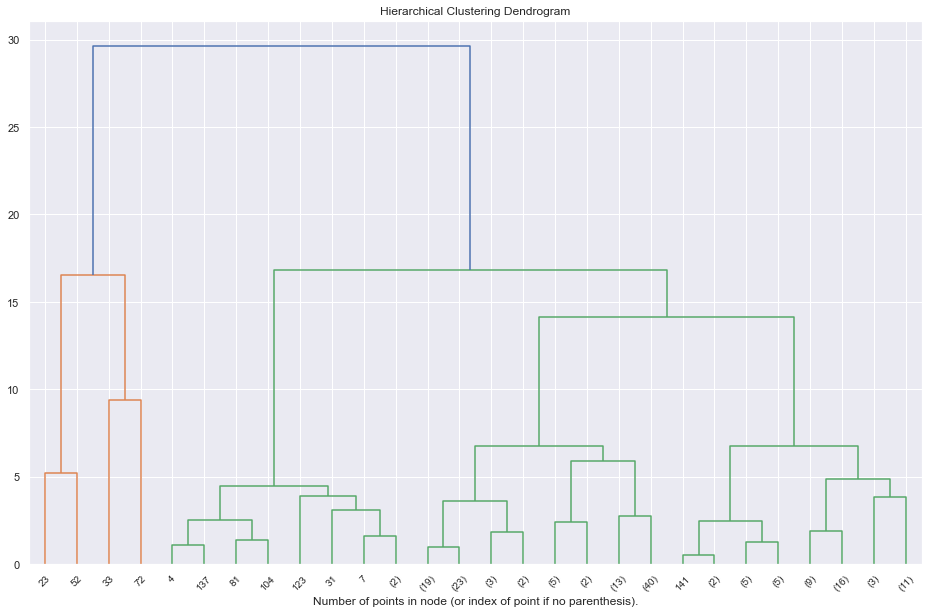

In [136]:
## representer le dendogramme
plt.figure(figsize=(16, 10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Premiere methode :Classification Ascendante Hiérarchique

In [137]:
## utilisation de la methode silouhette , elle permet de savoir le nombre de cluster pertinent
from sklearn.metrics import silhouette_samples, silhouette_score

# A list holds the silhouette coefficients for each k
hc_silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    hcmod = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    hcmod.fit(scaled_features)
    score = silhouette_score(scaled_features, hcmod.fit_predict(scaled_features))
    hc_silhouette_coefficients.append(score)

In [138]:
## ligne qui donne la meilleur solution
bestclustn = range(2,11)[hc_silhouette_coefficients.index(min(hc_silhouette_coefficients))]
bestclustn

8

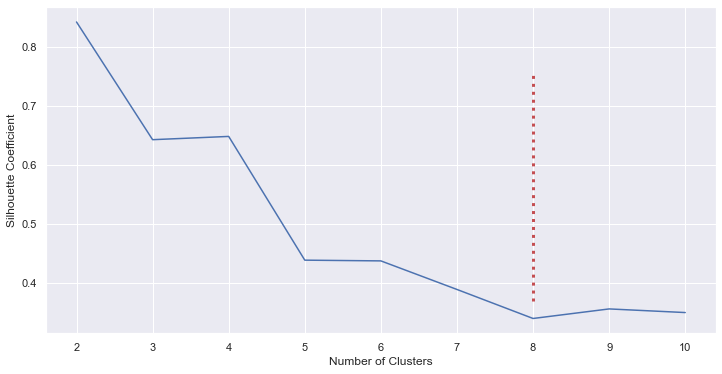

In [139]:
# plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), hc_silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

## line indicating lowest average silouhette score
plt.axvline(x=bestclustn, ymin=0.1, ymax=0.8, color='r', linestyle=':', linewidth=3)

plt.show()

In [140]:
model3c = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')

model3c = model3c.fit(scaled_features)
model3c

AgglomerativeClustering(n_clusters=8)

## Deuxieme methode: k-means

In [141]:
## utiliser une techinque statistique pour avoir le nombre de clusteur le plus pertinent(methode silouette et du coude)
## a voir dans le ficher recu
## utiliser K-means
## puis faire une analyse en composante principal.

from sklearn.cluster import KMeans

In [142]:
## k-means, c'est la deuxiéme methode de clustering:
# A list holds the silhouette coefficients for each k
km_silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 13):
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_features)

    score = silhouette_score(scaled_features, cluster_labels)
    km_silhouette_coefficients.append(score)

In [143]:
bestclustn = range(2,11)[km_silhouette_coefficients.index(min(km_silhouette_coefficients))]
bestclustn

10

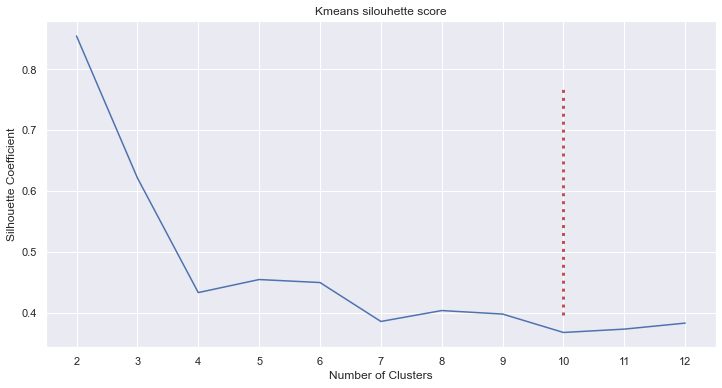

In [144]:
## plt.style.use("fivethirtyeight")
plt.plot(range(2, 13), km_silhouette_coefficients)
plt.xticks(range(2, 13))
plt.title("Kmeans silouhette score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

plt.axvline(x=bestclustn, ymin=0.1, ymax=0.8, color='r', linestyle=':', linewidth=3)

plt.show()

In [145]:
## le numeros de clustering
labels = model3c.fit_predict(scaled_features) 
print(labels)

[7 2 0 7 2 0 6 2 3 0 3 0 0 6 7 6 3 0 3 0 3 0 7 1 0 7 0 7 7 3 3 2 3 5 3 3 3
 0 3 7 0 0 3 7 3 0 0 2 0 3 0 7 1 7 3 3 0 0 3 7 0 0 0 6 0 7 7 3 0 0 3 7 4 7
 3 0 3 3 6 0 6 2 3 0 7 7 0 6 7 0 0 0 3 0 0 7 3 7 0 7 3 0 3 7 2 7 0 7 3 0 7
 0 7 7 0 3 3 0 7 7 7 3 7 2 0 0 3 6 3 7 0 0 0 3 7 7 0 2 7 6 6 6 6 0 7 0 7 0
 3 7 7 0 0 3 7 7 0 3 7 7 6 0 7 3 0 0 0 0 0 0 7 7]


In [146]:
## creation de la colonne cluster
ViandeDV["cluster8"]=labels
ViandeDV.head()

,Zone,Population,Exportations - Quantité,Importations - Quantité,Production,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),cluster8
0,Afghanistan,36296.113,0.0,29.0,28.0,57.0,1.53,7
1,Afrique du Sud,57009.756,63.0,514.0,1667.0,2118.0,35.69,2
2,Albanie,2884.169,0.0,38.0,13.0,47.0,16.36,0
3,Algérie,41389.189,0.0,2.0,275.0,277.0,6.38,7
4,Allemagne,82658.409,646.0,842.0,1514.0,1739.0,19.47,2


In [147]:
## on regarde le nombre de valeures en fonction de chacune des valeures de la colonne cluster
ViandeDV.cluster8.value_counts()

0    60
7    47
3    39
6    13
2     9
1     2
5     1
4     1
Name: cluster8, dtype: int64

In [148]:
## exemple; regarder les pays qui sont du 2eme cluster
ViandeDV[ViandeDV["cluster8"]==2]

,Zone,Population,Exportations - Quantité,Importations - Quantité,Production,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an),cluster8
1,Afrique du Sud,57009.756,63.0,514.0,1667.0,2118.0,35.69,2
4,Allemagne,82658.409,646.0,842.0,1514.0,1739.0,19.47,2
7,Arabie saoudite,33101.179,10.0,722.0,616.0,1435.0,43.36,2
31,Chine - RAS de Hong-Kong,7306.322,663.0,907.0,24.0,280.0,53.51,2
47,Émirats arabes unis,9487.203,94.0,433.0,48.0,412.0,43.47,2
81,Japon,127502.725,10.0,1069.0,2215.0,2415.0,18.50,2
104,Mexique,124777.324,9.0,972.0,3249.0,4219.0,32.52,2
123,Pays-Bas,17021.347,1418.0,608.0,1100.0,372.0,20.33,2
137,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,359.0,779.0,1814.0,2234.0,31.94,2


# ACP

In [127]:
# choix du nombre de composantes à calculer
n_comp = 4

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(21,18))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='12', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            # plt.xlim([-boundary,boundary])
            # plt.ylim([-boundary,boundary])
            
            plt.xlim([-5,5])
            plt.ylim([-5,5])
            
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [75]:
from matplotlib import pyplot as plt
from sklearn import decomposition

pca = decomposition.PCA(n_components=n_comp)
pca.fit(scaled_features)
## on a choisi 4 composantes principales

PCA(n_components=4)

In [76]:
scaled_features

array([[-0.04288902, -0.22715699, -0.3210665 , -0.27574216, -0.28700723,
        -1.18143472],
       [ 0.09283303, -0.0892207 ,  2.29654176,  0.38855948,  0.6630779 ,
         0.97865768],
       [-0.26181418, -0.22715699, -0.27249233, -0.2818218 , -0.29161705,
        -0.24366627],
       ...,
       [-0.09832998, -0.22715699, -0.05660711, -0.21899889, -0.19988152,
        -0.73879283],
       [-0.17028225, -0.22496752, -0.41281772, -0.26723067, -0.28562428,
        -1.06192141],
       [-0.18742965, -0.22715699, -0.4452005 , -0.25912449, -0.27824856,
        -0.98224587]])

In [77]:
ViandeDV.columns

Index(['Zone', 'Population', 'Exportations - Quantité',
       'Importations - Quantité', 'Production', 'Disponibilité intérieure',
       'Disponibilité alimentaire en quantité (kg/personne/an)', 'cluster8'],
      dtype='object')

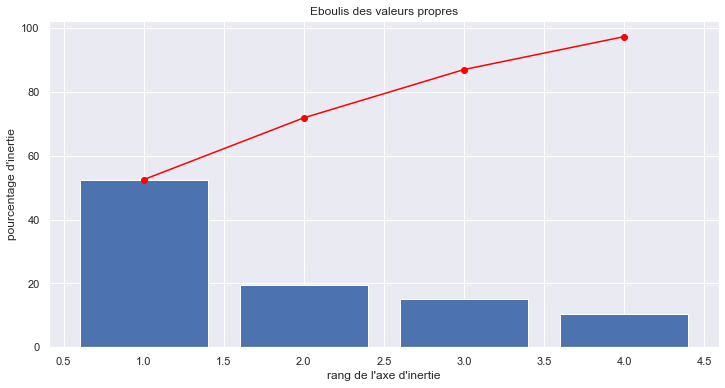

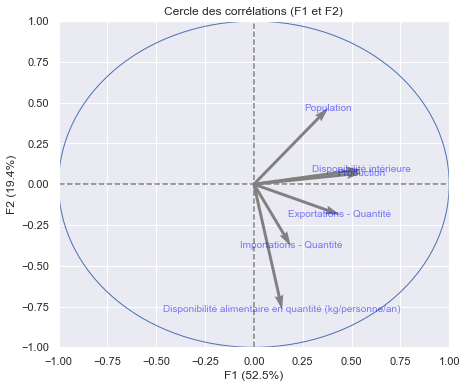

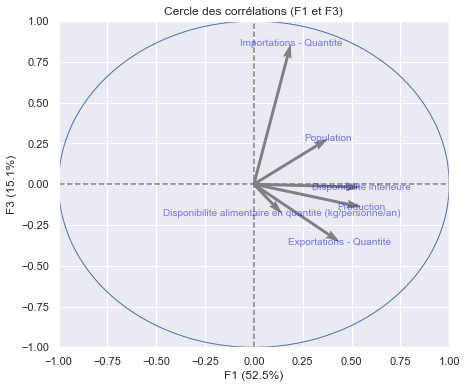

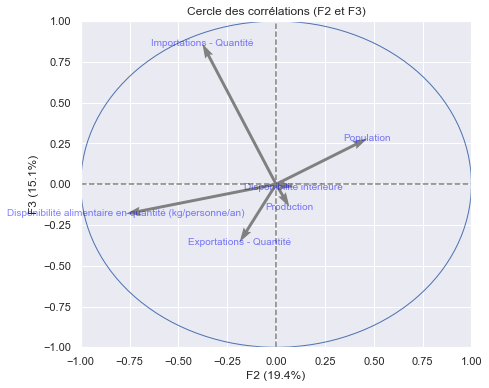

In [78]:
## le pourcentage d'inertie explique le pourcentage de données par composante
features = ViandeDV.columns[1:7]

display_scree_plot(pca)    
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(features))

## cercle de correlations

In [79]:
n_comp = 4

pca = decomposition.PCA(n_components=n_comp)
pca.fit(scaled_features)

pd.DataFrame(pca.components_, index=["F"+str(i+1) for i in range(n_comp)] , columns=features)


,Population,Exportations - Quantité,Importations - Quantité,Production,Disponibilité intérieure,Disponibilité alimentaire en quantité (kg/personne/an)
F1,0.380721,0.440784,0.189151,0.550731,0.548368,0.144811
F2,0.467286,-0.186874,-0.377846,0.068306,0.090544,-0.768824
F3,0.279720,-0.354915,0.861920,-0.139632,-0.017971,-0.181842
F4,0.530871,-0.538118,-0.275405,-0.043751,0.046983,0.590454


## Visualisation de mes clusters

Text(0.5, 1.0, 'Projection des 172 individus sur le 1e plan factoriel')

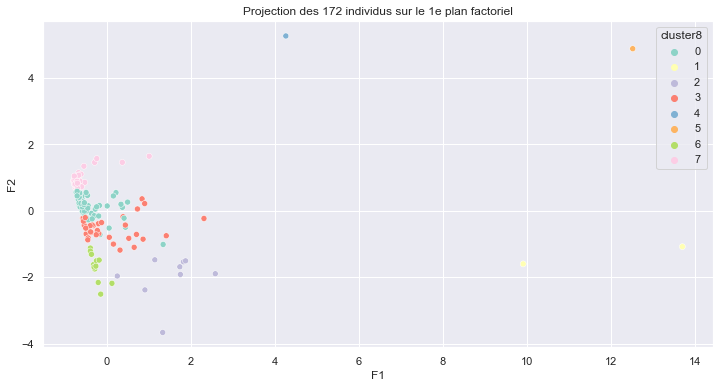

In [93]:
import seaborn as sns
X_projected = pca.transform(scaled_features)
Projectionpays=pd.DataFrame(X_projected)
Projectionpays.columns=['F1','F2','F3','F4']
Projectionpays['cluster8']=ViandeDV['cluster8']
Projectionpays['Pays']=ViandeDV['Zone']

sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(data=Projectionpays ,x='F1', y='F2',hue='cluster8', palette="Set3")

plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
## on voit la valeur de chaque pays pour la nouvelle composante F1
## pays(f1=14,F2=-2)

In [124]:
## les clusters avec le moins de pays:
Projectionpays[Projectionpays.cluster8.isin([1,2])]

,F1,F2,F3,F4,cluster8,Pays
1,1.149733,-1.473524,1.792935,0.056820,2,Afrique du Sud
4,1.832717,-1.533915,3.111038,-1.639489,2,Allemagne
7,0.914262,-2.379705,2.734838,0.017149,2,Arabie saoudite
23,9.917767,-1.596423,-4.456773,-3.151475,1,Brésil
31,1.337802,-3.661182,2.967092,-0.752464,2,Chine - RAS de Hong-Kong
47,0.257007,-1.960793,1.321242,0.257633,2,Émirats arabes unis
52,13.706127,-1.077490,-3.864125,-1.968102,1,États-Unis d'Amérique
81,1.881010,-1.504525,4.709309,-1.105591,2,Japon
104,2.589439,-1.892326,4.019182,-0.425511,2,Mexique
123,1.745039,-1.683886,1.327159,-2.419704,2,Pays-Bas


In [92]:
## nombres de pays par clusters 
Projectionpays.cluster8.value_counts()

0    60
7    47
3    39
6    13
2     9
1     2
5     1
4     1
Name: cluster8, dtype: int64

In [88]:
##coordonnées de chaques pays et le cluster auquel il appartient
Projectionpays['Pays']=ViandeDV['Zone']
Projectionpays

,F1,F2,F3,F4,cluster8,Pays
0,-0.657516,1.007216,0.050385,-0.511111,7,Afghanistan
1,1.149733,-1.473524,1.792935,0.056820,2,Afrique du Sud
2,-0.601755,0.164750,-0.138579,-0.086951,0,Albanie
3,-0.517215,0.858103,-0.137451,-0.271793,7,Algérie
4,1.832717,-1.533915,3.111038,-1.639489,2,Allemagne
...,...,...,...,...,...,...
167,-0.235585,0.122297,-0.233543,0.173106,0,Venezuela (République bolivarienne du)
168,0.344377,0.198573,1.191192,-0.286573,0,Viet Nam
169,-0.485474,0.552835,0.172841,-0.350406,0,Yémen
170,-0.699654,0.890768,-0.088054,-0.484390,7,Zambie


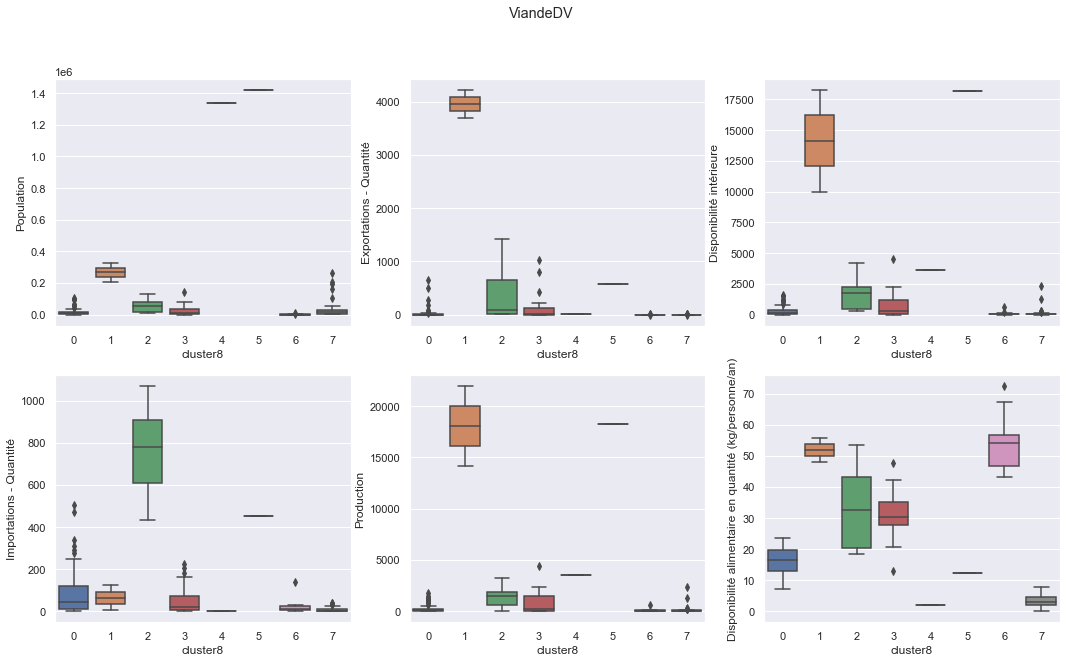

In [109]:
## observation des cluster en fonction de chacune des variables:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('ViandeDV')

ax = sns.boxplot(ax=axes[0, 0],x='cluster8', y="Population", ## hue="smoker",              
data=ViandeDV, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[0, 1],x='cluster8', y="Exportations - Quantité", ## hue="smoker",              
data=ViandeDV, # palette="Set3"
                )

ax = sns.boxplot(ax=axes[1, 0],x='cluster8', y="Importations - Quantité", ## hue="smoker",              
data=ViandeDV, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[1, 1],x='cluster8', y="Production", ## hue="smoker",              
data=ViandeDV, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[0, 2],x='cluster8', y="Disponibilité intérieure", ## hue="smoker",              
data=ViandeDV, # palette="Set3"
                )
ax = sns.boxplot(ax=axes[1, 2],x='cluster8', y="Disponibilité alimentaire en quantité (kg/personne/an)", ## hue="smoker",              
data=ViandeDV, # palette="Set3"
                )